## Create Latitude and Longitude Combinations

In [68]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

> NOTE
You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [70]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [71]:
coordinates[0]

(-64.61223694913713, 128.4748441740336)

In [72]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [73]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [184]:
print(cities[0:50])

['new norfolk', 'yellowknife', 'do gonbadan', 'boizenburg', 'kapaa', 'tual', 'upington', 'mataura', 'albany', 'faanui', 'ushuaia', 'taolanaro', 'bluff', 'otjimbingwe', 'east london', 'hilo', 'stow', 'kahului', 'saint-philippe', 'gardan diwal', 'basoko', 'prosec', 'letlhakane', 'pontianak', 'kodiak', 'qaanaaq', 'punta arenas', 'sur', 'bredasdorp', 'lorengau', 'jamestown', 'vaitape', 'uthal', 'butaritari', 'chuy', 'grindavik', 'dikson', 'victoria', 'khudumelapye', 'griffith', 'hasaki', 'kingseat', 'bage', 'burica', 'duki', 'carnarvon', 'barrow', 'borogontsy', 'castro', 'agropoli']


>The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.



In [117]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [166]:
#create endpoint url
city = citipy.nearest_city(coordinates[0][0],coordinates[0][1]).city_name
url_end = 'http://api.openweathermap.org/data/2.5/weather?q='+city+'&units='+units+'&appid='+weather_api_key

In [146]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [168]:
url = 'http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid='+weather_api_key 

In [170]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [172]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | do gonbadan
Processing Record 4 of Set 1 | boizenburg
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | tual
Processing Record 7 of Set 1 | upington
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | otjimbingwe
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | stow
Processing Record 18 of Set 1 | kahului
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | gardan diwal
City not found. Skipping...
Processing Record 21 of Set 1 | basoko
Processing Record 22 of Set 1 |

In [177]:
len(city_data)

585

In [178]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.78,147.06,79.00,27,87,3.00,AU,2020-11-03 00:25:28
1,Yellowknife,62.46,-114.35,10.99,92,90,9.17,CA,2020-11-03 00:22:48
2,Do Gonbadan,30.36,50.80,53.60,32,0,2.19,IR,2020-11-03 00:27:28
3,Boizenburg,53.38,10.72,53.01,79,59,1.01,DE,2020-11-03 00:27:28
4,Kapaa,22.08,-159.32,82.40,74,90,14.99,US,2020-11-03 00:24:11
5,Tual,-5.67,132.75,82.63,77,99,10.11,ID,2020-11-03 00:27:28
6,Upington,-28.45,21.26,73.40,21,37,5.82,ZA,2020-11-03 00:27:28
7,Mataura,-46.19,168.86,61.00,64,41,3.00,NZ,2020-11-03 00:24:07
8,Albany,42.60,-73.97,37.00,59,34,5.50,US,2020-11-03 00:15:05
9,Faanui,-16.48,-151.75,79.70,80,6,17.09,PF,2020-11-03 00:26:09


In [180]:
#reorder columns 
city_data_df = city_data_df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2020-11-03 00:25:28,-42.78,147.06,79.00,27,87,3.00
1,Yellowknife,CA,2020-11-03 00:22:48,62.46,-114.35,10.99,92,90,9.17
2,Do Gonbadan,IR,2020-11-03 00:27:28,30.36,50.80,53.60,32,0,2.19
3,Boizenburg,DE,2020-11-03 00:27:28,53.38,10.72,53.01,79,59,1.01
4,Kapaa,US,2020-11-03 00:24:11,22.08,-159.32,82.40,74,90,14.99


In [253]:
city_data_df.to_pickle('ciy_data.pk1')

In [258]:
load_city_df = pd.read_pickle('ciy_data.pk1')

In [259]:
load_city_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2020-11-03 00:25:28,-42.78,147.06,79.00,27,87,3.00
1,Yellowknife,CA,2020-11-03 00:22:48,62.46,-114.35,10.99,92,90,9.17
2,Do Gonbadan,IR,2020-11-03 00:27:28,30.36,50.80,53.60,32,0,2.19
3,Boizenburg,DE,2020-11-03 00:27:28,53.38,10.72,53.01,79,59,1.01
4,Kapaa,US,2020-11-03 00:24:11,22.08,-159.32,82.40,74,90,14.99


In [ ]:
C:\Users\Donne\OneDrive\UT_Data_Analytics\Analysis Projects\

first should work, need to fix path issues, second has worked with raw string 'r'<br>
ref: https://stackoverflow.com/questions/37400974/unicode-error-unicodeescape-codec-cant-decode-bytes-in-position-2-3-trunca

In [ ]:
# Export the City_Data into a CSV.
city_data_df.to_csv(r"weather_data\cities.csv", index_label="City_ID")

In [229]:
part = r'C:\Users\Donne\OneDrive\UT_Data_Analytics\Analysis Projects\Mod6_World_Weather_Analysis\World_Weather_Analysis\weather_data\cities.csv'
city_data_df.to_csv(part, index_label="City_ID")

## Exploratory Analysis with Visualization

In [239]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [240]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/02/20'

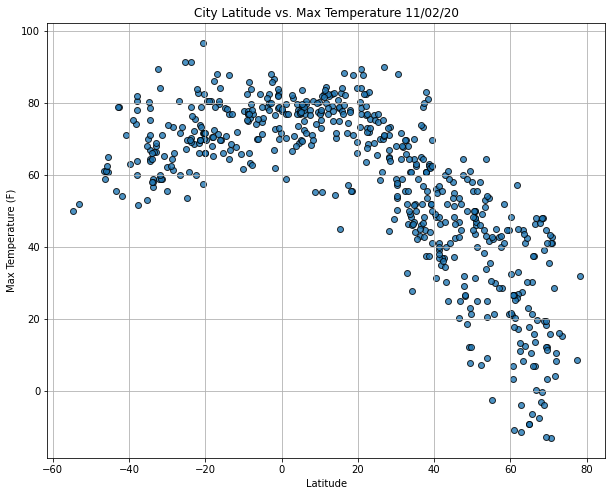

In [271]:
# Build the scatter plot for latitude vs. max temperature.
plt.figure(figsize=(10,8))
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
# plt.savefig("Fig1.png") -- commented out incase of rerunning cell, fig is no saved again 

# Show plot.
plt.show();

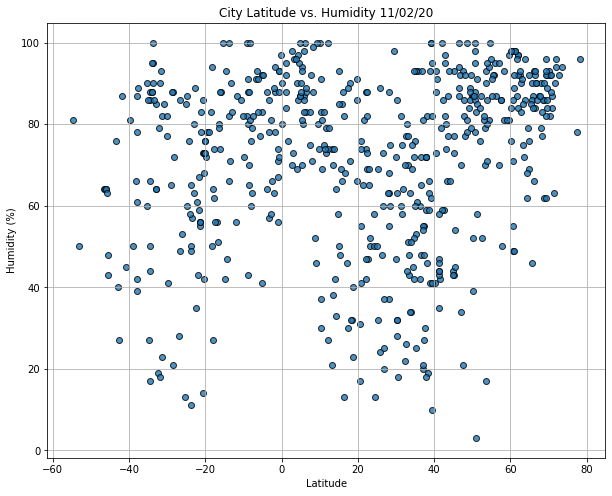

In [270]:
# Build the scatter plots for latitude vs. humidity.
plt.figure(figsize=(10,8))
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("Fig2.png")
# Show plot.
plt.show();

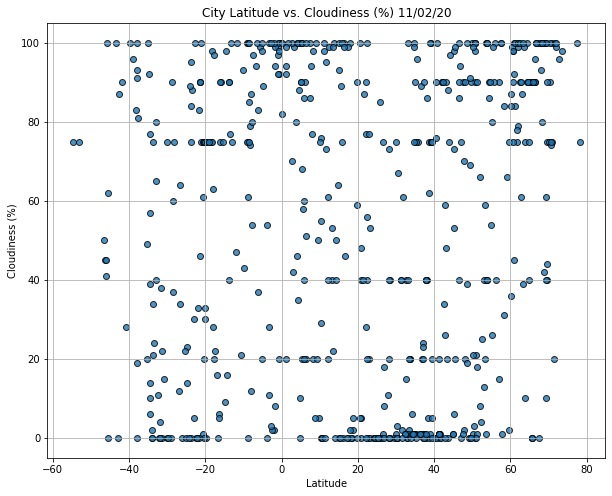

In [273]:
# Build the scatter plots for latitude vs. cloudiness.
plt.figure(figsize=(10,8))
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("Fig3.png")
# Show plot.
plt.show();

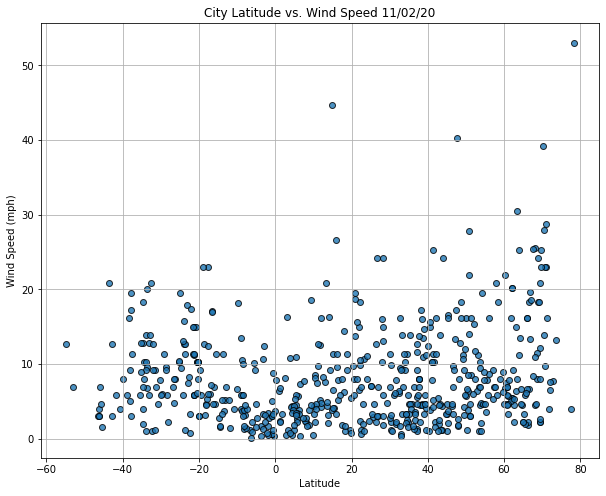

In [276]:
# Build the scatter plots for latitude vs. wind speed.
plt.figure(figsize=(10,8))
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("Fig4.png")
# Show plot.
plt.show();